In [49]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [85]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [6]:
for dirpath, dirnames, filenames in os.walk("/kaggle/input"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} wave files in '{dirpath}'.")

There are 1 directories and 0 wave files in '/kaggle/input'.
There are 1 directories and 0 wave files in '/kaggle/input/surrey-audiovisual-expressed-emotion-savee'.
There are 0 directories and 480 wave files in '/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL'.


In [15]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        if(label[0]!='s'):
            labels.append(label[0].lower())
        else:
            labels.append(label[:2].lower())   
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [16]:
labels

['h',
 'f',
 'h',
 'd',
 'a',
 'f',
 'h',
 'su',
 'a',
 'n',
 'f',
 'n',
 'a',
 'n',
 'sa',
 'a',
 'f',
 'd',
 'd',
 'n',
 'h',
 'f',
 'd',
 'd',
 'h',
 'f',
 'a',
 'a',
 'd',
 'sa',
 'n',
 'n',
 'n',
 'sa',
 'n',
 'h',
 'su',
 'n',
 'n',
 'sa',
 'f',
 'sa',
 'h',
 'f',
 'd',
 'd',
 'a',
 'su',
 'n',
 'sa',
 'f',
 'h',
 'su',
 'sa',
 'd',
 'sa',
 'sa',
 'sa',
 'su',
 'sa',
 'h',
 'su',
 'a',
 'd',
 'n',
 'a',
 'f',
 'sa',
 'n',
 'd',
 'su',
 'd',
 'n',
 'n',
 'su',
 'n',
 'h',
 'n',
 'n',
 'a',
 'sa',
 'a',
 'su',
 'su',
 'su',
 'd',
 'd',
 'su',
 'h',
 'a',
 'n',
 'n',
 'su',
 'h',
 'n',
 'a',
 'sa',
 'h',
 'h',
 'f',
 'n',
 'd',
 'su',
 'f',
 'n',
 'd',
 'su',
 'a',
 'su',
 'h',
 'n',
 'f',
 'h',
 'sa',
 'd',
 'a',
 'h',
 'n',
 'su',
 'h',
 'su',
 'su',
 'f',
 'd',
 'n',
 'su',
 'a',
 'n',
 'n',
 'h',
 'a',
 'n',
 'n',
 'su',
 'f',
 'n',
 'n',
 'f',
 'n',
 'n',
 'f',
 'su',
 'n',
 'su',
 'h',
 'sa',
 'sa',
 'n',
 'f',
 'n',
 'sa',
 'd',
 'f',
 'd',
 'h',
 'a',
 'd',
 'sa',
 'su',
 's

In [17]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech label
0  /kaggle/input/surrey-audiovisual-expressed-emo...     h
1  /kaggle/input/surrey-audiovisual-expressed-emo...     f
2  /kaggle/input/surrey-audiovisual-expressed-emo...     h
3  /kaggle/input/surrey-audiovisual-expressed-emo...     d
4  /kaggle/input/surrey-audiovisual-expressed-emo...     a

In [18]:
df['label'].value_counts()

n     120
h      60
f      60
d      60
a      60
su     60
sa     60
Name: label, dtype: int64

In [21]:
sns.countplot(df['label'])

ValueError: could not convert string to float: 'h'

In [25]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

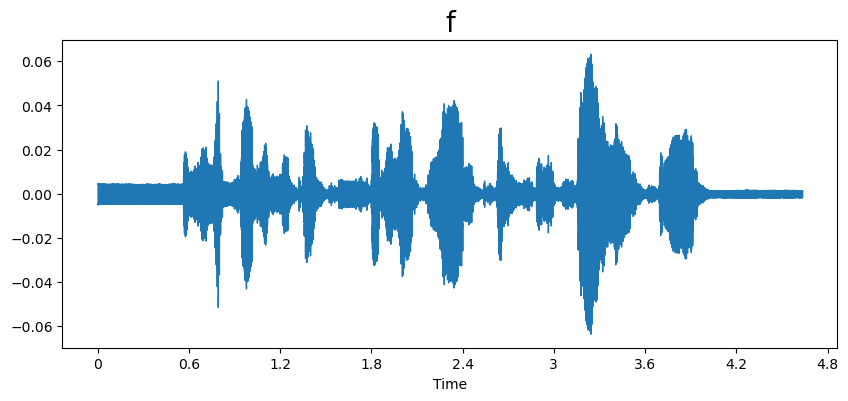

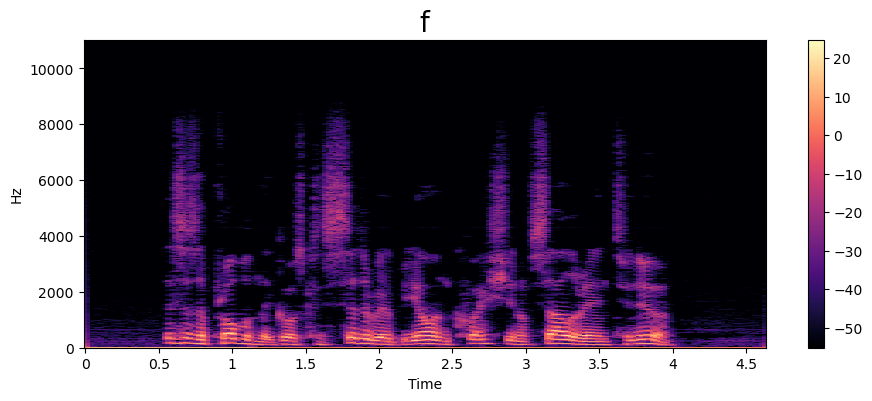

In [26]:
emotion = 'f'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

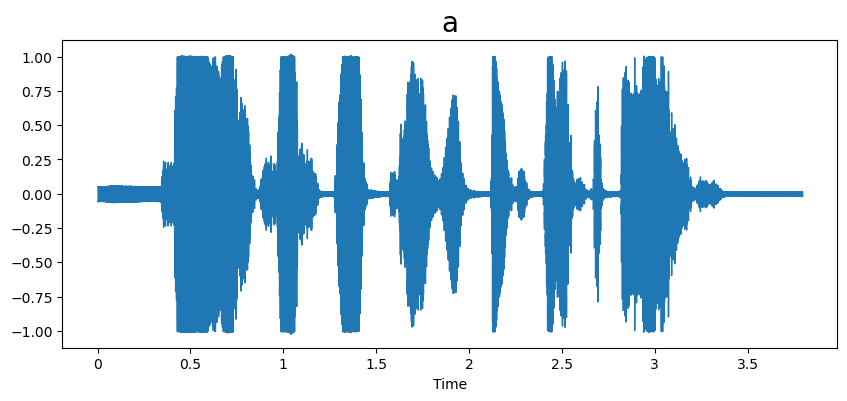

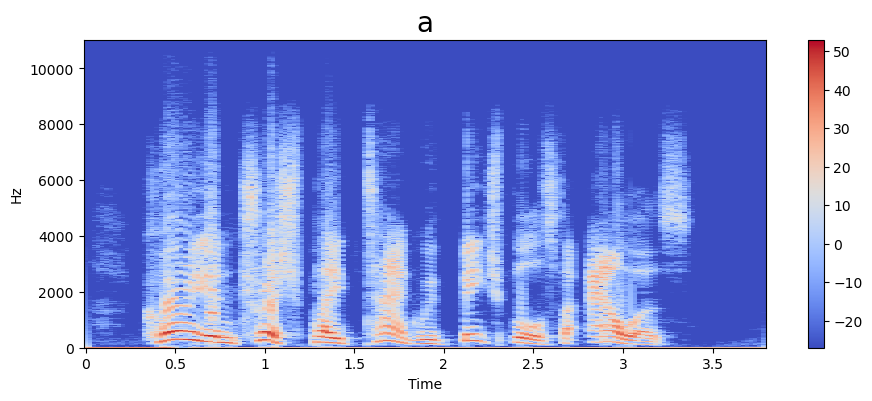

In [27]:
emotion = 'a'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

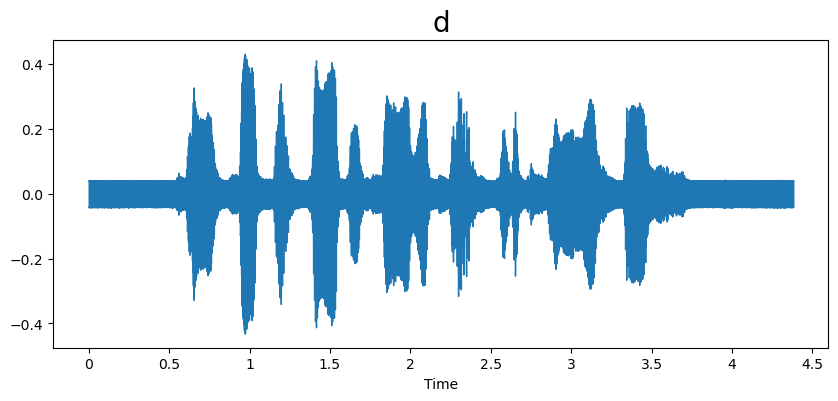

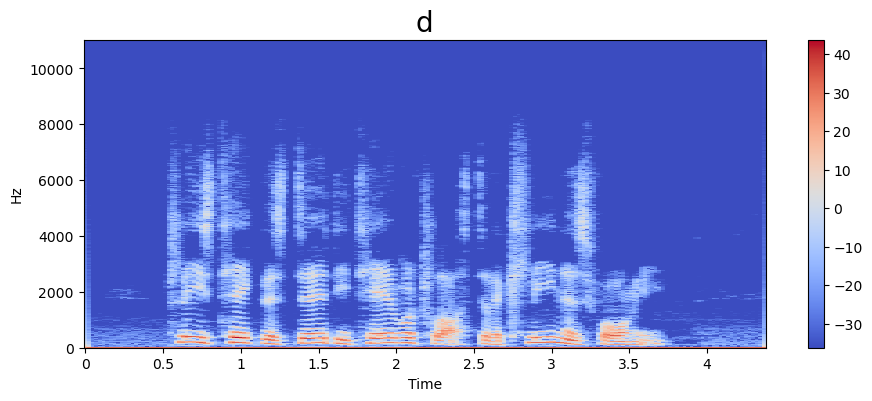

In [28]:
emotion = 'd'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

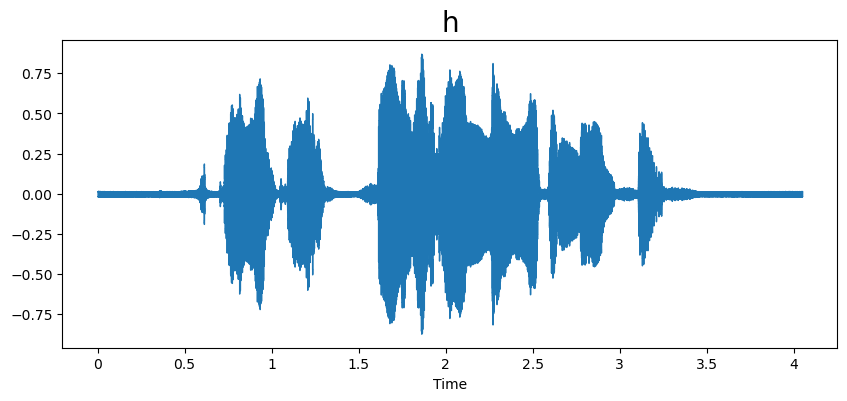

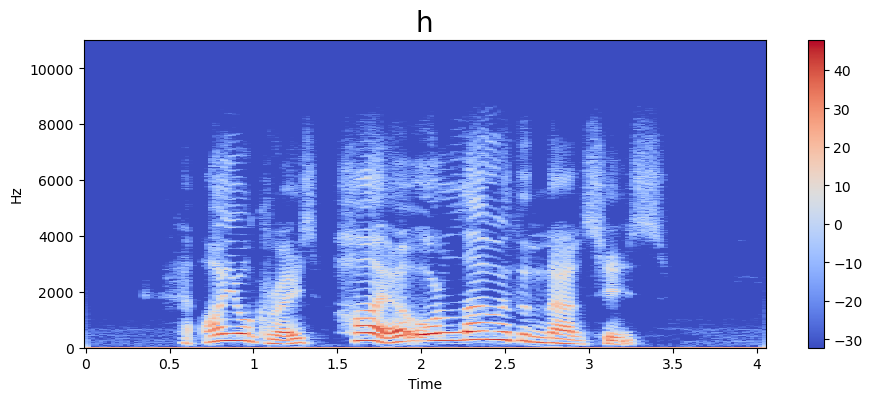

In [29]:
emotion = 'h'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

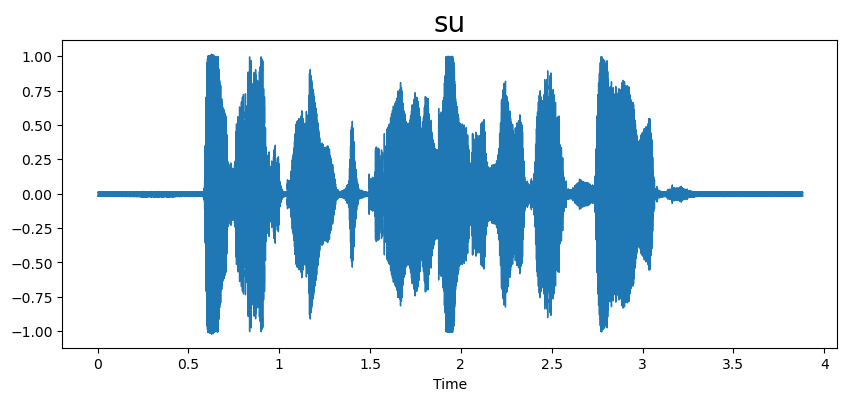

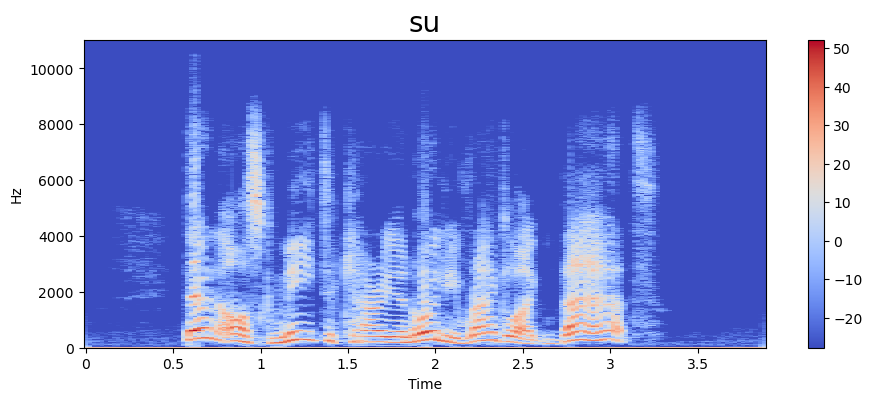

In [30]:
emotion = 'su'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

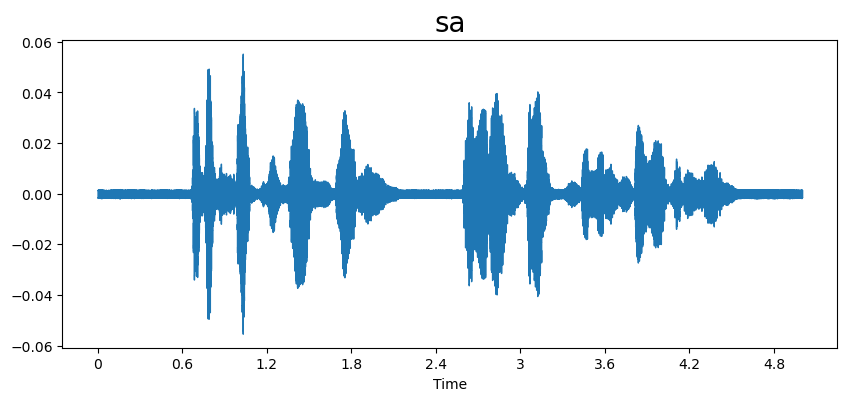

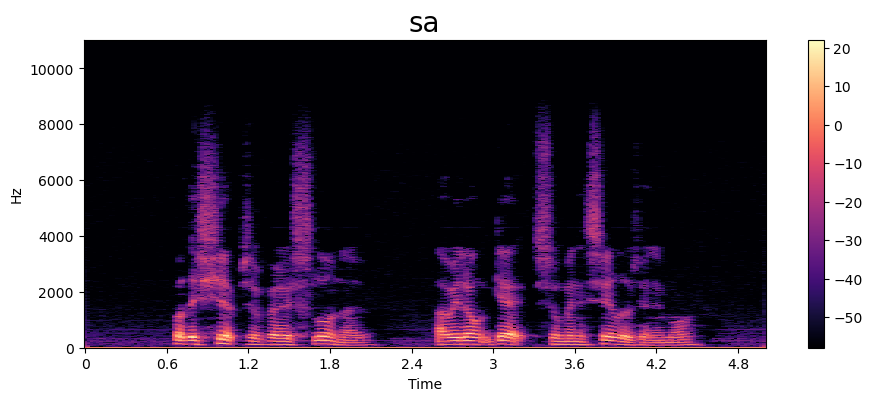

In [31]:
emotion = 'sa'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

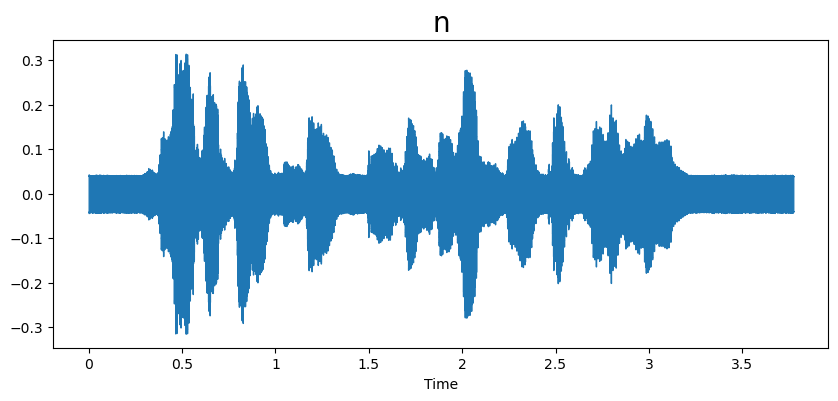

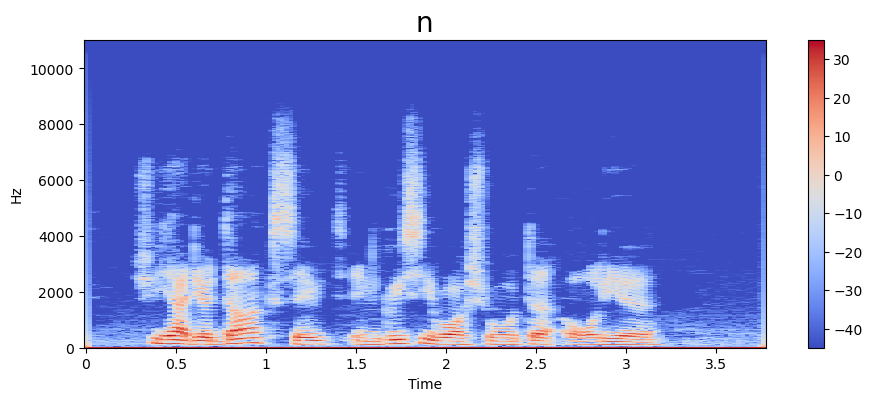

In [32]:
emotion = 'n'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [35]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [36]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0      [-279.52878, 119.52984, 9.490824, 29.066372, -...
1      [-551.75195, 142.6986, 29.528128, 35.493782, -...
2      [-312.72452, 104.94343, -0.10860157, 21.7445, ...
3      [-353.20938, 125.2113, 21.365974, 54.305614, 2...
4      [-505.12885, 144.70926, 2.1966054, 36.198936, ...
                             ...                        
475    [-235.4837, 89.97566, -5.799604, 34.713345, -1...
476    [-411.12045, 153.92467, 24.6467, 28.942274, 21...
477    [-394.31226, 150.90813, 12.915916, 35.460228, ...
478    [-562.3806, 139.8668, 10.947633, 38.683167, 13...
479    [-505.38293, 140.03116, 9.367473, 39.056705, 1...
Name: speech, Length: 480, dtype: object

In [37]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(480, 40)

In [38]:
X = np.expand_dims(X, -1)
X.shape

(480, 40, 1)

In [43]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(480, 7)

In [90]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Conv1D,MaxPooling1D,BatchNormalization

#Build the model

# define model
model000 = Sequential()
model000.add(Conv1D(480, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

          
model000.add(Conv1D(240, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

model000.add(Conv1D(120, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))
          
model000.add(LSTM(64, return_sequences=True)) 
model000.add(LSTM(164, return_sequences=True)) 
model000.add(Dropout(0.3))
model000.add(LSTM(128))
model000.add(Dropout(0.3))

model000.add(Dense(64, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(64, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(32, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(7, activation='softmax'))



model000.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 40, 480)           2880      
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 20, 480)          0         
 g1D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 20, 480)          1920      
 chNormalization)                                                
                                                                 
 dropout_54 (Dropout)        (None, 20, 480)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 20, 240)           576240    
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 10, 240)        

In [91]:
model000.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])

In [92]:
history = model000.fit(X, y, validation_split=0.2, epochs=100, batch_size=64)

Epoch 1/100
6/6 [==============================] - 10s 460ms/step - loss: 1.9435 - accuracy: 0.1927 - val_loss: 1.9353 - val_accuracy: 0.2812
Epoch 2/100
6/6 [==============================] - 1s 165ms/step - loss: 1.9162 - accuracy: 0.2422 - val_loss: 1.9109 - val_accuracy: 0.2812
Epoch 3/100
6/6 [==============================] - 1s 165ms/step - loss: 1.8588 - accuracy: 0.2422 - val_loss: 2.0709 - val_accuracy: 0.2812
Epoch 4/100
6/6 [==============================] - 1s 155ms/step - loss: 1.7447 - accuracy: 0.2786 - val_loss: 2.1963 - val_accuracy: 0.2812
Epoch 5/100
6/6 [==============================] - 1s 152ms/step - loss: 1.6824 - accuracy: 0.3385 - val_loss: 2.2267 - val_accuracy: 0.2812
Epoch 6/100
6/6 [==============================] - 1s 154ms/step - loss: 1.6068 - accuracy: 0.3568 - val_loss: 2.1269 - val_accuracy: 0.2812
Epoch 7/100
6/6 [==============================] - 1s 157ms/step - loss: 1.5160 - accuracy: 0.3646 - val_loss: 1.7523 - val_accuracy: 0.2917
Epoch 8/100


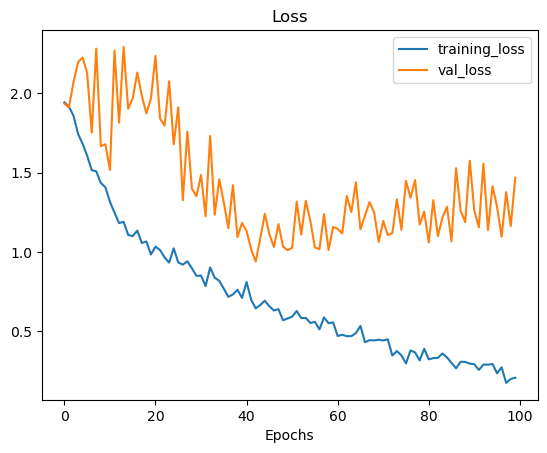

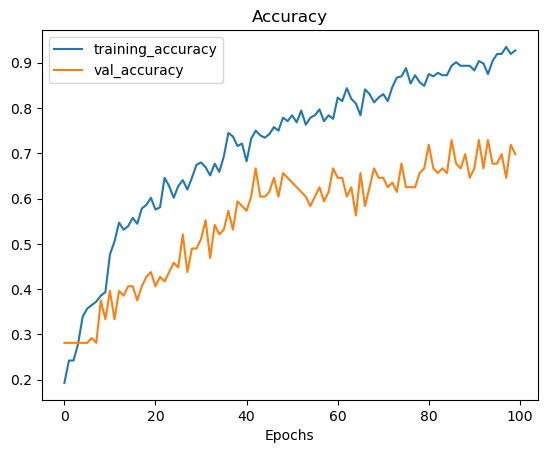

In [93]:
plot_loss_curves(history)